<a href="https://colab.research.google.com/github/joseph444/ml-algos/blob/master/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_tnc
%matplotlib inline

In [2]:
"""
Creating a function which will map all the values from 0-1 into two class
class-1 if x >threshold
else class0
"""
def zero_or_one(x,threshold=0.5):
    """
      x: is a value 
      threshold: is the midvalue of threshold
      returns 1 or 0 based on the condition
    """
    if x>threshold:
        return 1
    else:
        return 0

#Creating a Dataset


In [3]:
x=np.linspace(1,100,100)
x=x.reshape((100,1))
y=np.linspace(0,1,100)
np.random.shuffle(y)
np.random.shuffle(y)
np.random.shuffle(y)
y=y.reshape((100,1))

#Plotting Against X and Y where Y will be divided into class 1 and class 0



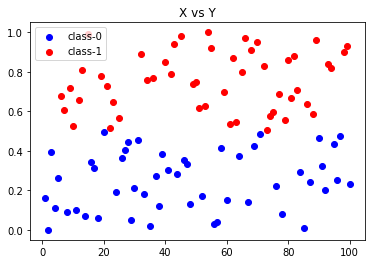

In [4]:
class_1y=[]
class_0y=[]
class_1x=[]
class_0x=[]
for i in range(100):
    if y[i]<=0.5:
        class_0y.append(y[i])
        class_0x.append(x[i])
    else:
        class_1y.append(y[i])
        class_1x.append(x[i])

plt.title("X vs Y")
plt.scatter(class_0x,class_0y,label="class-0",color="blue")
plt.scatter(class_1x,class_1y,label="class-1",color="red")
plt.legend()
plt.show()

In [5]:
#Scaling the x
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

In [6]:
class LogisticRegression:
      @staticmethod
      def sigmoid(x):
          """
          x: an numpy array
          returns the result as an array
          """
          return 1/(1+np.exp(-x))
      
      @staticmethod
      def net_input(theta,x):
          return np.dot(x,theta)

      def probability(self,x,theta):
          return self.sigmoid(self.net_input(theta,x))
    
      def cost(self,theta,x,y):
          """
          Computes the cost of the Logistic regression
          x: is the array of independentVariable
          y: is the array of dependent variable
          theta is the coeffiecnet matrix
          m is the no of samples
          returns the cost of the current classification
          """
          m=x.shape[0]
          p1=-(1/m)
          q1=y*np.log(self.probability(x,theta))+(1-y)*np.log(1-self.probability(x,theta))
          p2=np.sum(q1)
          total_cost= p1*p2
          return total_cost
      
      def gradient(self,theta,x,y):
          """
          Calculates the gradient of the cost function
          x: is the array of independentVariable
          y: is the array of dependent variable
          theta is the coeffiecnet matrix
          m is the no of samples
          returns the local minima of the current cost function
          """
          m=x.shape[0]
          dj=(1/m)*np.dot(x.T,(self.sigmoid(self.net_input(theta,x))-y))
          return dj
      def getTheta(self,x,y):
          """
          calculates the regressional coefficient 
          x: the array of independent variables
          y: the array of dependent variables
          returns Theta
          """
          p1=np.linalg.inv(np.dot(x.T,x))
          p2=np.dot(x.T,y)
          theta=np.dot(p1,p2)
          return theta
     


      def fit(self,x,y):
          """
          we will fetch the minima of the cost for the provided x and y and then tracing back to the weight fo the variables will give us the reqired values
          """
          ones=np.ones((x.shape[0],1))
          X=np.hstack((ones,x))
          y=y[:,np.newaxis]
          theta=np.zeros((X.shape[1],1))
          m=y.shape[0]
          self.weight=fmin_tnc(func=self.cost,x0=theta,fprime=self.gradient,args=(X,y.flatten()))[0]
      
      def predict(self,x):
          theta=self.weight[:,np.newaxis]
          ones=np.ones((x.shape[0],1))
          X=np.hstack((ones,x))
          return self.probability(X,theta)
      def accuracy(self,x,y,threshold=0.5):
          predicted_class=(self.predict(x)>=threshold).astype(int)
          predicted_class=predicted_class.flatten()
          actual_class=(y>=threshold).astype(int)
          actual_class=actual_class.flatten()
          accuracy=np.mean(predicted_class==actual_class)
          return accuracy*100

          



In [7]:
classifier=LogisticRegression()
classifier.fit(X,y)


In [12]:
m=classifier.predict(X)

In [9]:
classifier.accuracy(X,y.flatten())

57.99999999999999

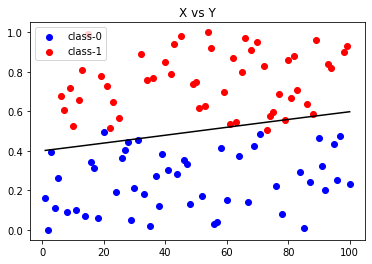

In [11]:
class_1y=[]
class_0y=[]
class_1x=[]
class_0x=[]
for i in range(100):
    if y[i]<=0.5:
        class_0y.append(y[i])
        class_0x.append(x[i])
    else:
        class_1y.append(y[i])
        class_1x.append(x[i])

plt.title("X vs Y")
plt.scatter(class_0x,class_0y,label="class-0",color="blue")
plt.scatter(class_1x,class_1y,label="class-1",color="red")
plt.plot(x,classifier.predict(X),color="black")
plt.legend()
plt.show()

#Logistic regression helps us to classify between two groups that is if we have class A and Class B and let th be the threshold between both of them then logistic regression helps us to draw aline between those two classes so that we can classify it

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y)
ypred=classifier.predict(xtest)
classifier.accuracy(xtest,ytest.flatten())

60.0

In [15]:
xtest

array([[ 1.33374581],
       [-0.32910611],
       [ 1.29910306],
       [ 1.71481604],
       [-0.19053512],
       [ 0.19053512],
       [ 1.5416023 ],
       [-0.6062481 ],
       [ 0.43303435],
       [ 0.15589237],
       [-1.26446031],
       [ 1.12588932],
       [-0.22517786],
       [ 0.25982061],
       [-0.29446336],
       [-0.81410459],
       [ 0.71017634],
       [-0.12124962],
       [-0.25982061],
       [-0.67553359],
       [-1.40303131],
       [ 1.50695955],
       [-0.08660687],
       [ 0.22517786],
       [-1.68017329]])

In [29]:
array=[[ 78.],
       [10.]]

test=np.array(array)
test=sc.fit_transform(test)
classifier.predict(test)


array([[0.557548],
       [0.442452]])

In [30]:
print(y[77])
print(y[9])

[0.08080808]
[0.52525253]


In [25]:
x[22]

array([23.])